In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics as st
from scipy.stats import iqr

# DESCRIPTIVE STATISTICS

## NHANES DATASET

In [2]:
nhanesdf = pd.read_csv("nhanes_features_FINAL.csv")
print(nhanesdf.shape)
print(nhanesdf.info())

(5856, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5856 non-null   float64
 1   DPQ010    5856 non-null   float64
 2   DPQ020    5856 non-null   float64
 3   DPQ030    5856 non-null   float64
 4   DPQ040    5856 non-null   float64
 5   DPQ050    5856 non-null   float64
 6   DPQ060    5856 non-null   float64
 7   DPQ070    5856 non-null   float64
 8   DPQ080    5856 non-null   float64
 9   DPQ090    5856 non-null   float64
 10  AGE       5856 non-null   float64
 11  INDHHIN2  5856 non-null   float64
 12  MCQ010    5856 non-null   float64
 13  MCQ080    5856 non-null   float64
 14  MCQ160A   5856 non-null   float64
 15  MCQ160B   5856 non-null   float64
 16  MCQ160C   5856 non-null   float64
 17  MCQ160D   5856 non-null   float64
 18  MCQ160E   5856 non-null   float64
 19  MCQ160F   5856 non-null   float64
 20  MCQ160M   5856 non-

In [3]:
nhanesdf.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,INSNOCH,SEXML,RACEWH,RACEBL,RACEOT,INSSTATE,EDUC,MCQ700,PHQSCR,DI
0,93705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,1,0,1,2,0,0.0,0
1,93706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,4,0,0.0,0
2,93708.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,0,1,0,1,0,0.0,0
3,93709.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,1,0,1,4,0,0.0,1
4,93711.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,5,0,2.0,0


In [4]:
nhanesdf.rename(columns={'AGE':'Age','SEXML':'Gender','RACEBL':'Black','RACEOT':'Other Race','RACEWH':'White',
                         'EDUC':'Education','INDHHIN2':'Income','INSMCARE':'Medicare','INSNOCH':'Uninsured',
                         'INSPRVT':'Commercial','INSSTATE':'State-funded','MCQ160O':'COPD','MCQ160A':'Arthritis',
                         'MCQ010':'Asthma','MCQ160K':'Bronchitis','MCQ160B':'CHF','MCQ160C':'Vascular',
                         'MCQ160D':'Chest Pain','MCQ080':'Overweight','MCQ160E':'Heart attack','MCQ160F':'Stroke',
                         'MCQ160G':'Emphysema','MCQ160M':'Thyroid','MCQ700':'Liver','MCQ220':'Cancer','DPQ010':'DPQ1',
                         'DPQ020':'DPQ2','DPQ030':'DPQ3','DPQ040':'DPQ4','DPQ050':'DPQ5','DPQ060':'DPQ6','DPQ070':'DPQ7',
                         'DPQ080':'DPQ8','DPQ090':'DPQ9','PHQSCR':'PHQ Score','DLQ140':'Feels DPRN','DLQ150':'DPRN Meds',
                         'DLQ170':'DPRN Level','DI':'DI'}, inplace=True)

In [5]:
#Descriptive statistics for continuous data
nhanesdf1= nhanesdf[['Age','PHQ Score']]
nhanesdf1.describe()

,Age,PHQ Score
count,5856.000000,5856.000000
mean,49.886100,2.819672
std,18.775991,4.109342
min,18.000000,0.000000
25%,33.000000,0.000000
50%,51.000000,1.000000
75%,65.000000,4.000000
max,80.000000,25.000000


In [6]:
print('median of Age:', nhanesdf.loc[:,'Age'].median())
print('median of PHQ Score:', nhanesdf.loc[:,'PHQ Score'].median())

median of Age: 51.0
median of PHQ Score: 1.0


In [7]:
# Calculating descriptive statistics for int datatypes
cols=set(nhanesdf.columns)- {'SEQN'}
nhanesdf2 = nhanesdf[list(cols)]

In [8]:
nhanesdf2.mode().T

,0
Cancer,0.0
DPQ1,0.0
Uninsured,0.0
DPQ4,0.0
Education,4.0
DPQ9,0.0
DPRN Meds,2.0
Overweight,0.0
COPD,0.0
Medicare,0.0


In [9]:
nhanesdf2.std()

Cancer           0.300571
DPQ1             0.722374
Uninsured        0.013068
DPQ4             0.908591
Education        1.209707
DPQ9             0.282530
DPRN Meds        0.386546
Overweight       0.485585
COPD             0.218034
Medicare         0.443276
Gender           0.499817
Bronchitis       0.250825
Other Race       0.494181
DPRN Level       1.145233
Heart attack     0.209734
Feels DPRN       1.270755
Age             18.775991
Arthritis        0.453544
DPQ8             0.512650
DPQ6             0.586790
DPQ3             0.912182
State-funded     0.380029
White            0.476055
Liver            0.218386
Asthma           0.358370
DPQ7             0.637577
Chest Pain       0.163529
Thyroid          0.315210
DI               0.430253
Vascular         0.207876
Income           4.980565
Emphysema        0.133328
Commercial       0.499856
CHF              0.182075
Black            0.420443
DPQ5             0.738442
Stroke           0.210839
DPQ2             0.677685
PHQ Score   

In [10]:
nhanesdf2.var()

Cancer            0.090343
DPQ1              0.521824
Uninsured         0.000171
DPQ4              0.825537
Education         1.463391
DPQ9              0.079823
DPRN Meds         0.149418
Overweight        0.235792
COPD              0.047539
Medicare          0.196494
Gender            0.249817
Bronchitis        0.062913
Other Race        0.244215
DPRN Level        1.311559
Heart attack      0.043988
Feels DPRN        1.614819
Age             352.537836
Arthritis         0.205702
DPQ8              0.262810
DPQ6              0.344322
DPQ3              0.832075
State-funded      0.144422
White             0.226628
Liver             0.047693
Asthma            0.128429
DPQ7              0.406504
Chest Pain        0.026742
Thyroid           0.099357
DI                0.185118
Vascular          0.043212
Income           24.806023
Emphysema         0.017776
Commercial        0.249856
CHF               0.033151
Black             0.176772
DPQ5              0.545297
Stroke            0.044453
D

In [11]:
#Calculating IQR
def find_iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))
nhanesdf.loc[:, ~nhanesdf.columns.isin(['SEQN'])].apply(find_iqr)

DPQ1             0.0
DPQ2             0.0
DPQ3             1.0
DPQ4             1.0
DPQ5             0.0
DPQ6             0.0
DPQ7             0.0
DPQ8             0.0
DPQ9             0.0
Age             32.0
Income          10.0
Asthma           0.0
Overweight       1.0
Arthritis        1.0
CHF              0.0
Vascular         0.0
Chest Pain       0.0
Heart attack     0.0
Stroke           0.0
Thyroid          0.0
Emphysema        0.0
Bronchitis       0.0
COPD             0.0
Cancer           0.0
Feels DPRN       1.0
DPRN Meds        0.0
DPRN Level       2.0
Commercial       1.0
Medicare         1.0
Uninsured        0.0
Gender           1.0
White            1.0
Black            0.0
Other Race       1.0
State-funded     0.0
Education        1.0
Liver            0.0
PHQ Score        4.0
DI               0.0
dtype: float64

In [12]:
nhanesdf2.skew()

Cancer           2.659779
DPQ1             2.309571
Uninsured       76.524506
DPQ4             1.330228
Education       -0.522754
DPQ9             7.380971
DPRN Meds       -2.990925
Overweight       0.491801
COPD             4.128892
Medicare         1.044341
Gender          -0.060152
Bronchitis       3.450180
Other Race       0.309028
DPRN Level       0.803400
Heart attack     4.329761
Feels DPRN      -1.398617
Age             -0.055676
Arthritis        0.928797
DPQ8             4.010407
DPQ6             3.180848
DPQ3             1.598542
State-funded     1.710801
White            0.643026
Liver            4.120670
Asthma           1.946713
DPQ7             3.097025
Chest Pain       5.780836
Thyroid          2.463636
DI               1.184736
Vascular         4.376679
Income           0.039484
Emphysema        7.231217
Commercial       0.054679
CHF              5.116961
Black            1.287953
DPQ5             2.317683
Stroke           4.302201
DPQ2             2.478830
PHQ Score   

In [13]:
nhanesdf2.kurt()

Cancer             5.076159
DPQ1               4.738619
Uninsured       5856.000000
DPQ4               0.825129
Education         -0.537965
DPQ9              61.527603
DPRN Meds          8.733571
Overweight        -1.758732
COPD              15.052891
Medicare          -0.909664
Gender            -1.997064
Bronchitis         9.907129
Other Race        -1.905152
DPRN Level        -0.855055
Heart attack      16.752549
Feels DPRN         1.189707
Age               -1.167783
Arthritis         -1.137726
DPQ8              16.558272
DPQ6              10.304989
DPQ3               1.439218
State-funded       0.927158
White             -1.587060
Liver             14.985042
Asthma             1.790303
DPQ7               9.268403
Chest Pain        31.428794
Thyroid            4.070895
DI                -0.596604
Vascular          17.161184
Income            -1.174515
Emphysema         50.307686
Commercial        -1.997693
CHF               24.191547
Black             -0.341295
DPQ5               4

## NAMCS DATASET

In [14]:
namcsdf = pd.read_csv("namcs_features_FINAL.csv")
print(namcsdf.shape)
print(namcsdf.info())

(8701, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8701 entries, 0 to 8700
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8701 non-null   int64  
 1   AGE       8701 non-null   float64
 2   SEXML     8701 non-null   int64  
 3   RACEWH    8701 non-null   int64  
 4   RACEBL    8701 non-null   int64  
 5   RACEOT    8701 non-null   int64  
 6   NOPROVID  8701 non-null   float64
 7   PHYS      8701 non-null   float64
 8   PHYSASST  8701 non-null   float64
 9   NPNMW     8701 non-null   float64
 10  RNLPN     8701 non-null   float64
 11  MHP       8701 non-null   float64
 12  OTHPROV   8701 non-null   float64
 13  PROVNONE  8701 non-null   float64
 14  INSMCARE  8701 non-null   int64  
 15  INSSTATE  8701 non-null   int64  
 16  INSNOCH   8701 non-null   int64  
 17  INSPRVT   8701 non-null   int64  
 18  SPPRC     8701 non-null   int64  
 19  SPSUR     8701 non-null   int64  
 20  SPMEC     8701 non-

In [15]:
namcsdf.head()

,SEQN,AGE,SEXML,RACEWH,RACEBL,RACEOT,NOPROVID,PHYS,PHYSASST,NPNMW,...,DGRP12,DGRP13,DGRP14,DGRP15,DGRP16,DEPRN,DEPRESS,MENTAL,PSYCHOTH,DI
0,11000,69.0,1,1,0,0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0.0,0.0,0.0,0.0,0
1,11001,64.0,0,1,0,0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,11002,81.0,0,1,0,0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
3,11003,66.0,0,1,0,0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,11004,44.0,0,1,0,0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0


In [16]:
namcsdf.rename(columns={'AGE': 'Age','SEXML': 'Gender','RACEWH': 'White', 'RACEBL': 'Black', 'RACEOT': 'Other Race',
                        'SPMEC': 'Specialty Care','SPPRC': 'Primary Care','SPSUR': 'Surgery Care','RNLPN': 'Nurse',
                        'PHYS': 'MD/DO','PHYSASST': 'PA','NPNMW': 'NPNMW','MHP': 'MHP','PROVNONE': 'No provider',
                        'OTHPROV': 'Other provider','NOPROVID': 'Provider-withheld ','OWNPHYS': 'Phys. Owner',
                        'OWNHOSP': 'Hospital Owner','OWNUNK': ' Owner-withheld','OWNINSR': 'Insurance Owner',
                        'OWNUNKN': 'Unk Practice ','INSPRVT': 'Commercial','INSMCARE': 'Medicare','INSSTATE':'State-funded',
                        'INSNOCH':'Uninsured','DGRP1':'Infection','DGRP10':'Urinary','DGRP11':'Womens Health',
                        'DGRP12':'Genetic','DGRP13':'Other Disorder','DGRP14':'Injury','DGRP15':'Morbidity',
                        'DGRP16':'Public health','DGRP2':'Cancer/Blood','DGRP3':'Metabolic','DGRP4':'Neurologic',
                        'DGRP5':'Eyes/Ears','DGRP6':'Heart/Lung','DGRP7':'Digestive','DGRP8':'Skin','DGRP9':'Bones',
                        'NOCHRON':'No illness','DEPRN':'Chronic DPRN','MENTAL':'Therapy Referral','PSYCHOTH':'MHP Referral',
                        'DEPRESS':'DPRN Screen','DI':'DI'}, inplace=True)

In [17]:
#Descriptive statistics for continuous data
namcsdf1= namcsdf['Age']
namcsdf1.describe()

count    8701.000000
mean       58.104586
std        18.441697
min        18.000000
25%        45.000000
50%        61.000000
75%        72.000000
max        93.000000
Name: Age, dtype: float64

In [18]:
print('median of Age:', namcsdf.loc[:,'Age'].median())

median of Age: 61.0


In [19]:
# Calculating descriptive statistics for int datatypes
cols=set(namcsdf.columns)- {'SEQN','DIAGALL'}
namcsdf2 = namcsdf[list(cols)]

In [20]:
namcsdf2.mode().T

,0
Metabolic,0.0
Skin,0.0
Phys. Owner,1.0
Uninsured,0.0
Chronic DPRN,0.0
Insurance Owner,0.0
Digestive,0.0
Provider-withheld,0.0
Other provider,0.0
Medicare,0.0


In [21]:
namcsdf2.std()

Metabolic              0.212155
Skin                   0.284363
Phys. Owner            0.408861
Uninsured              0.154189
Chronic DPRN           0.304246
Insurance Owner        0.323344
Digestive              0.174650
Provider-withheld      0.032147
Other provider         0.461888
Medicare               0.479065
Gender                 0.493946
Urinary                0.228988
Eyes/Ears              0.347109
Other Race             0.234482
NPNMW                  0.108679
Age                   18.441697
Specialty Care         0.460783
Genetic                0.050223
PA                     0.181878
Other Disorder         0.277079
State-funded           0.271472
Neurologic             0.171220
White                  0.338943
No provider            0.021437
MHP Referral           0.141956
Womens Health          0.119936
Morbidity              0.000000
DPRN Screen            0.199959
Public health          0.365111
No illness             0.471661
Nurse                  0.300919
Surgery 

In [22]:
namcsdf2.var()

Metabolic               0.045010
Skin                    0.080863
Phys. Owner             0.167167
Uninsured               0.023774
Chronic DPRN            0.092566
Insurance Owner         0.104551
Digestive               0.030502
Provider-withheld       0.001033
Other provider          0.213341
Medicare                0.229503
Gender                  0.243983
Urinary                 0.052435
Eyes/Ears               0.120485
Other Race              0.054982
NPNMW                   0.011811
Age                   340.096187
Specialty Care          0.212321
Genetic                 0.002522
PA                      0.033080
Other Disorder          0.076773
State-funded            0.073697
Neurologic              0.029316
White                   0.114882
No provider             0.000460
MHP Referral            0.020151
Womens Health           0.014385
Morbidity               0.000000
DPRN Screen             0.039983
Public health           0.133306
No illness              0.222464
Nurse     

In [23]:
#Calculating IQR
def find_iqr(x):
    return np.subtract(*np.percentile(x, [75, 25]))
namcsdf.loc[:, ~namcsdf.columns.isin(['SEQN','DIAGALL'])].apply(find_iqr)

Age                   27.0
Gender                 1.0
White                  0.0
Black                  0.0
Other Race             0.0
Provider-withheld      0.0
MD/DO                  0.0
PA                     0.0
NPNMW                  0.0
Nurse                  0.0
MHP                    0.0
Other provider         1.0
No provider            0.0
Medicare               1.0
State-funded           0.0
Uninsured              0.0
Commercial             1.0
Primary Care           1.0
Surgery Care           1.0
Specialty Care         1.0
Unk Practice           0.0
Phys. Owner            0.0
Hospital Owner         0.0
Insurance Owner        0.0
No illness             1.0
Infection              0.0
Cancer/Blood           0.0
Metabolic              0.0
Neurologic             0.0
Eyes/Ears              0.0
Heart/Lung             0.0
Digestive              0.0
Skin                   0.0
Bones                  0.0
Urinary                0.0
Womens Health          0.0
Genetic                0.0
O

In [24]:
namcsdf2.skew()

Metabolic              4.269213
Skin                   2.893264
Phys. Owner           -1.408336
Uninsured              6.170944
Chronic DPRN           2.608973
Insurance Owner        2.359595
Digestive              5.366369
Provider-withheld     31.050140
Other provider         0.829524
Medicare               0.598217
Gender                 0.314883
Urinary                3.883100
Eyes/Ears              2.074181
Other Race             3.767605
NPNMW                  8.983506
Age                   -0.361364
Specialty Care         0.842989
Genetic               19.815093
PA                     5.122743
Other Disorder         3.005010
State-funded           3.094169
Neurologic             5.488643
White                 -2.169603
No provider           46.615444
MHP Referral           6.756159
Womens Health          8.096247
Morbidity              0.000000
DPRN Screen            4.584810
Public health          1.871792
No illness             0.704122
Nurse                  2.654624
Surgery 

In [25]:
namcsdf2.kurt()

Metabolic               16.229909
Skin                     6.372440
Phys. Owner             -0.016593
Uninsured               36.088851
Chronic DPRN             4.807845
Insurance Owner          3.568509
Digestive               26.804079
Provider-withheld      962.332415
Other provider          -1.312192
Medicare                -1.642514
Gender                  -1.901286
Urinary                 13.081472
Eyes/Ears                2.302755
Other Race              12.197655
NPNMW                   78.721478
Age                     -0.739763
Specialty Care          -1.289665
Genetic                390.727719
PA                      24.248071
Other Disorder           7.031703
State-funded             7.575624
Neurologic              28.131671
White                    2.707800
No provider           2171.498793
MHP Referral            43.655715
Womens Health           63.563834
Morbidity                0.000000
DPRN Screen             19.024853
Public health            1.503951
No illness    

# EXPLORATORY DATA ANALYSIS

In [26]:
namcsdf=pd.read_csv('namcs_features_FINAL.csv')

In [27]:
namcsdf.rename(columns={'AGE': 'Age','SEXML': 'Gender','RACEWH': 'White', 'RACEBL': 'Black', 'RACEOT': 'Other Race','SPMEC': 'Specialty Care','SPPRC': 'Primary Care','SPSUR': 'Surgery Care','RNLPN': 'Nurse','PHYS': 'MD/DO','PHYSASST': 'PA','NPNMW': 'NPNMW','MHP': 'MHP','PROVNONE': 'No provider','OTHPROV': 'Other provider','NOPROVID': 'Provider-withheld ','OWNPHYS': 'Phys. Owner','OWNHOSP': 'Hospital Owner','OWNUNK': ' Owner-withheld','OWNINSR': 'Insurance Owner','OWNUNKN': 'Unk Practice ','INSPRVT': 'Commercial','INSMCARE': 'Medicare','INSSTATE':'State-funded','INSNOCH':'Uninsured','DGRP1':'Infection','DGRP10':'Urinary','DGRP11':'Womens Health','DGRP12':'Genetic','DGRP13':'Other Disorder','DGRP14':'Injury','DGRP15':'Morbidity','DGRP16':'Public health','DGRP2':'Cancer/Blood','DGRP3':'Metabolic','DGRP4':'Neurologic','DGRP5':'Eyes/Ears','DGRP6':'Heart/Lung','DGRP7':'Digestive','DGRP8':'Skin','DGRP9':'Bones','NOCHRON':'No illness','DEPRN':'Chronic DPRN','MENTAL':'Therapy Referral','PSYCHOTH':'MHP Referral','DEPRESS':'DPRN Screen','DI':'DI'}, inplace=True)

In [28]:
nhanesdf=pd.read_csv('nhanes_features_FINAL.csv')

In [29]:
nhanesdf.rename(columns={'AGE':'Age','SEXML':'Gender','RACEBL':'Black','RACEOT':'Other Race','RACEWH':'White','EDUC':'Education','INDHHIN2':'Income','INSMCARE':'Medicare','INSNOCH':'Uninsured','INSPRVT':'Commercial','INSSTATE':'State-funded','MCQ160O':'COPD','MCQ160A':'Arthritis','MCQ010':'Asthma','MCQ160K':'Bronchitis','MCQ160B':'CHF','MCQ160C':'Vascular','MCQ160D':'Chest Pain','MCQ080':'Overweight','MCQ160E':'Heart attack','MCQ160F':'Stroke','MCQ160G':'Emphysema','MCQ160M':'Thyroid','MCQ700':'Liver','MCQ220':'Cancer','DPQ010':'DPQ1','DPQ020':'DPQ2','DPQ030':'DPQ3','DPQ040':'DPQ4','DPQ050':'DPQ5','DPQ060':'DPQ6','DPQ070':'DPQ7','DPQ080':'DPQ8','DPQ090':'DPQ9','PHQSCR':'PHQ Score','DLQ140':'Feels DPRN','DLQ150':'DPRN Meds','DLQ170':'DPRN Level','DI':'DI'}, inplace=True)

Heatmap of NAMCS

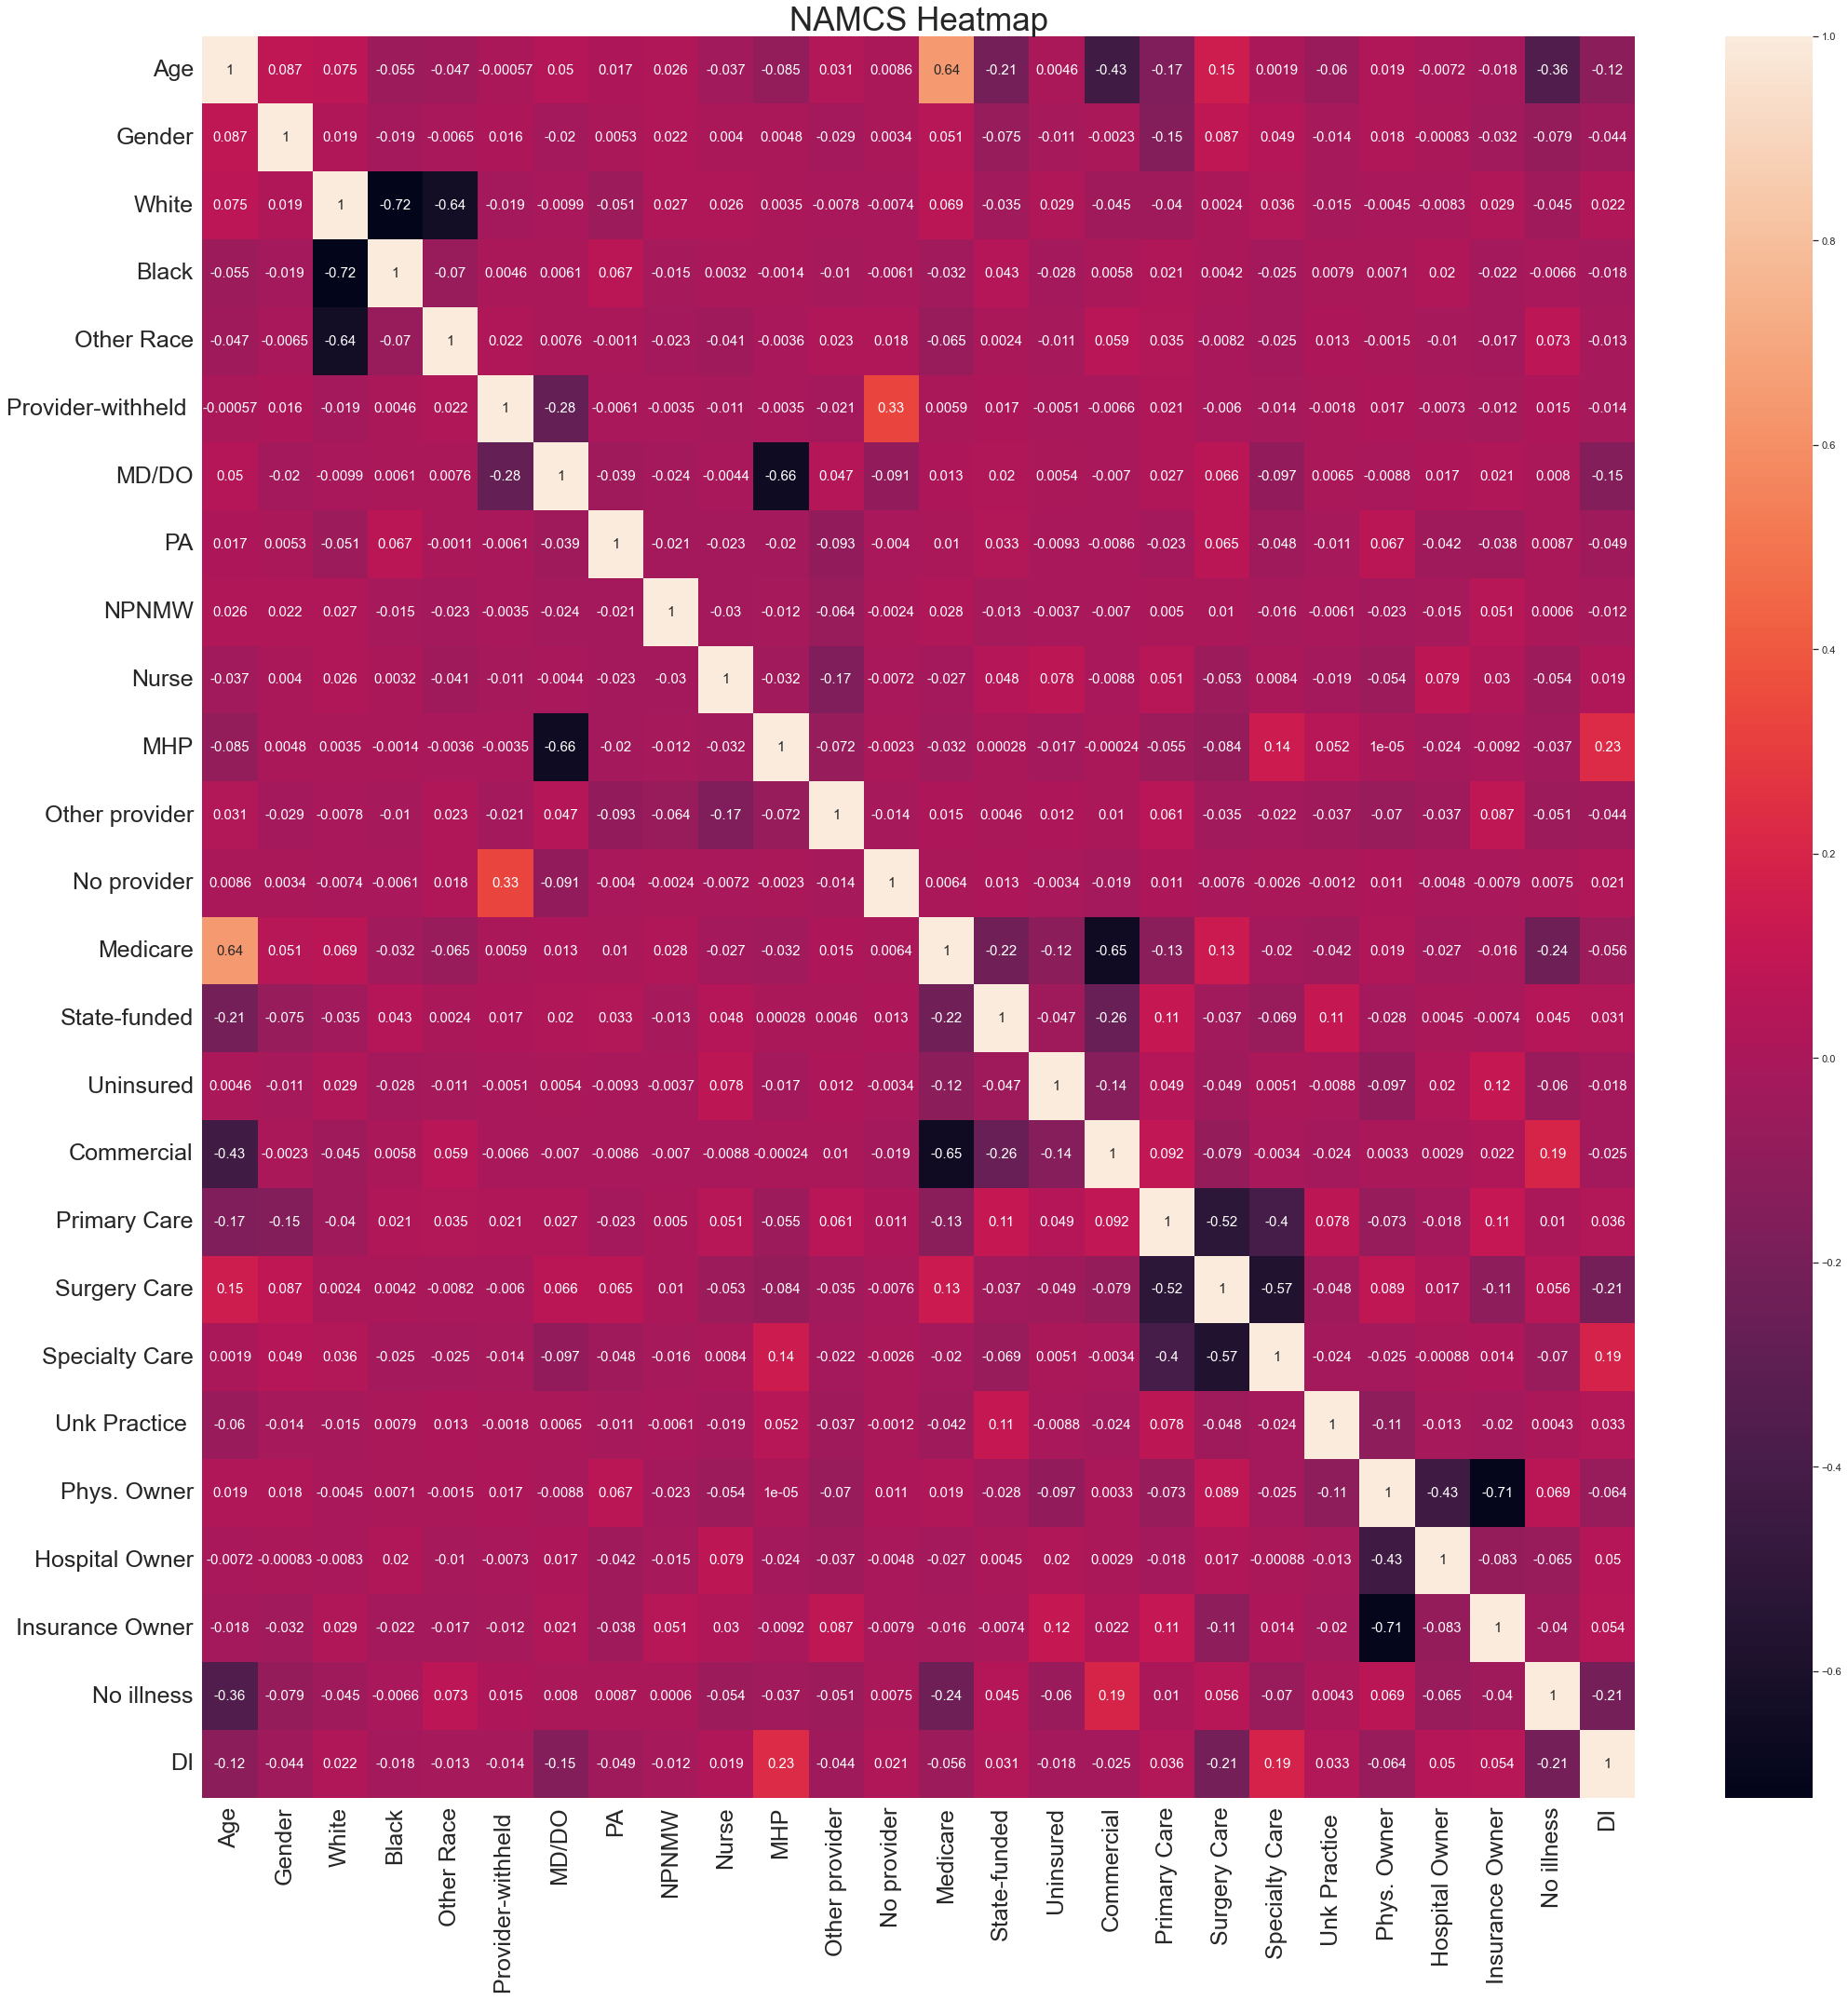

In [51]:
datanam = namcsdf.drop(['SEQN','Chronic DPRN','DPRN Screen','Therapy Referral','MHP Referral','Infection','Urinary','Womens Health','Genetic','Other Disorder','Injury','Morbidity','Public health','Cancer/Blood','Metabolic','Neurologic','Eyes/Ears','Heart/Lung','Digestive','Skin','Bones'],axis=1)
g = sns.heatmap(datanam.corr(),annot=True, annot_kws={"fontsize":15})
g.set_yticklabels(g.get_yticklabels(),size=25, rotation=0)
g.set_xticklabels(g.get_xticklabels(),size=25, rotation=90)
g.set_title('NAMCS Heatmap',size=35)
sns.set(rc = {'figure.figsize':(30,30)})
plt.tight_layout()
plt.savefig('fd NAMCS_Heatmap.png',dpi= 1200)
plt.show()

Heatmap of NHANES

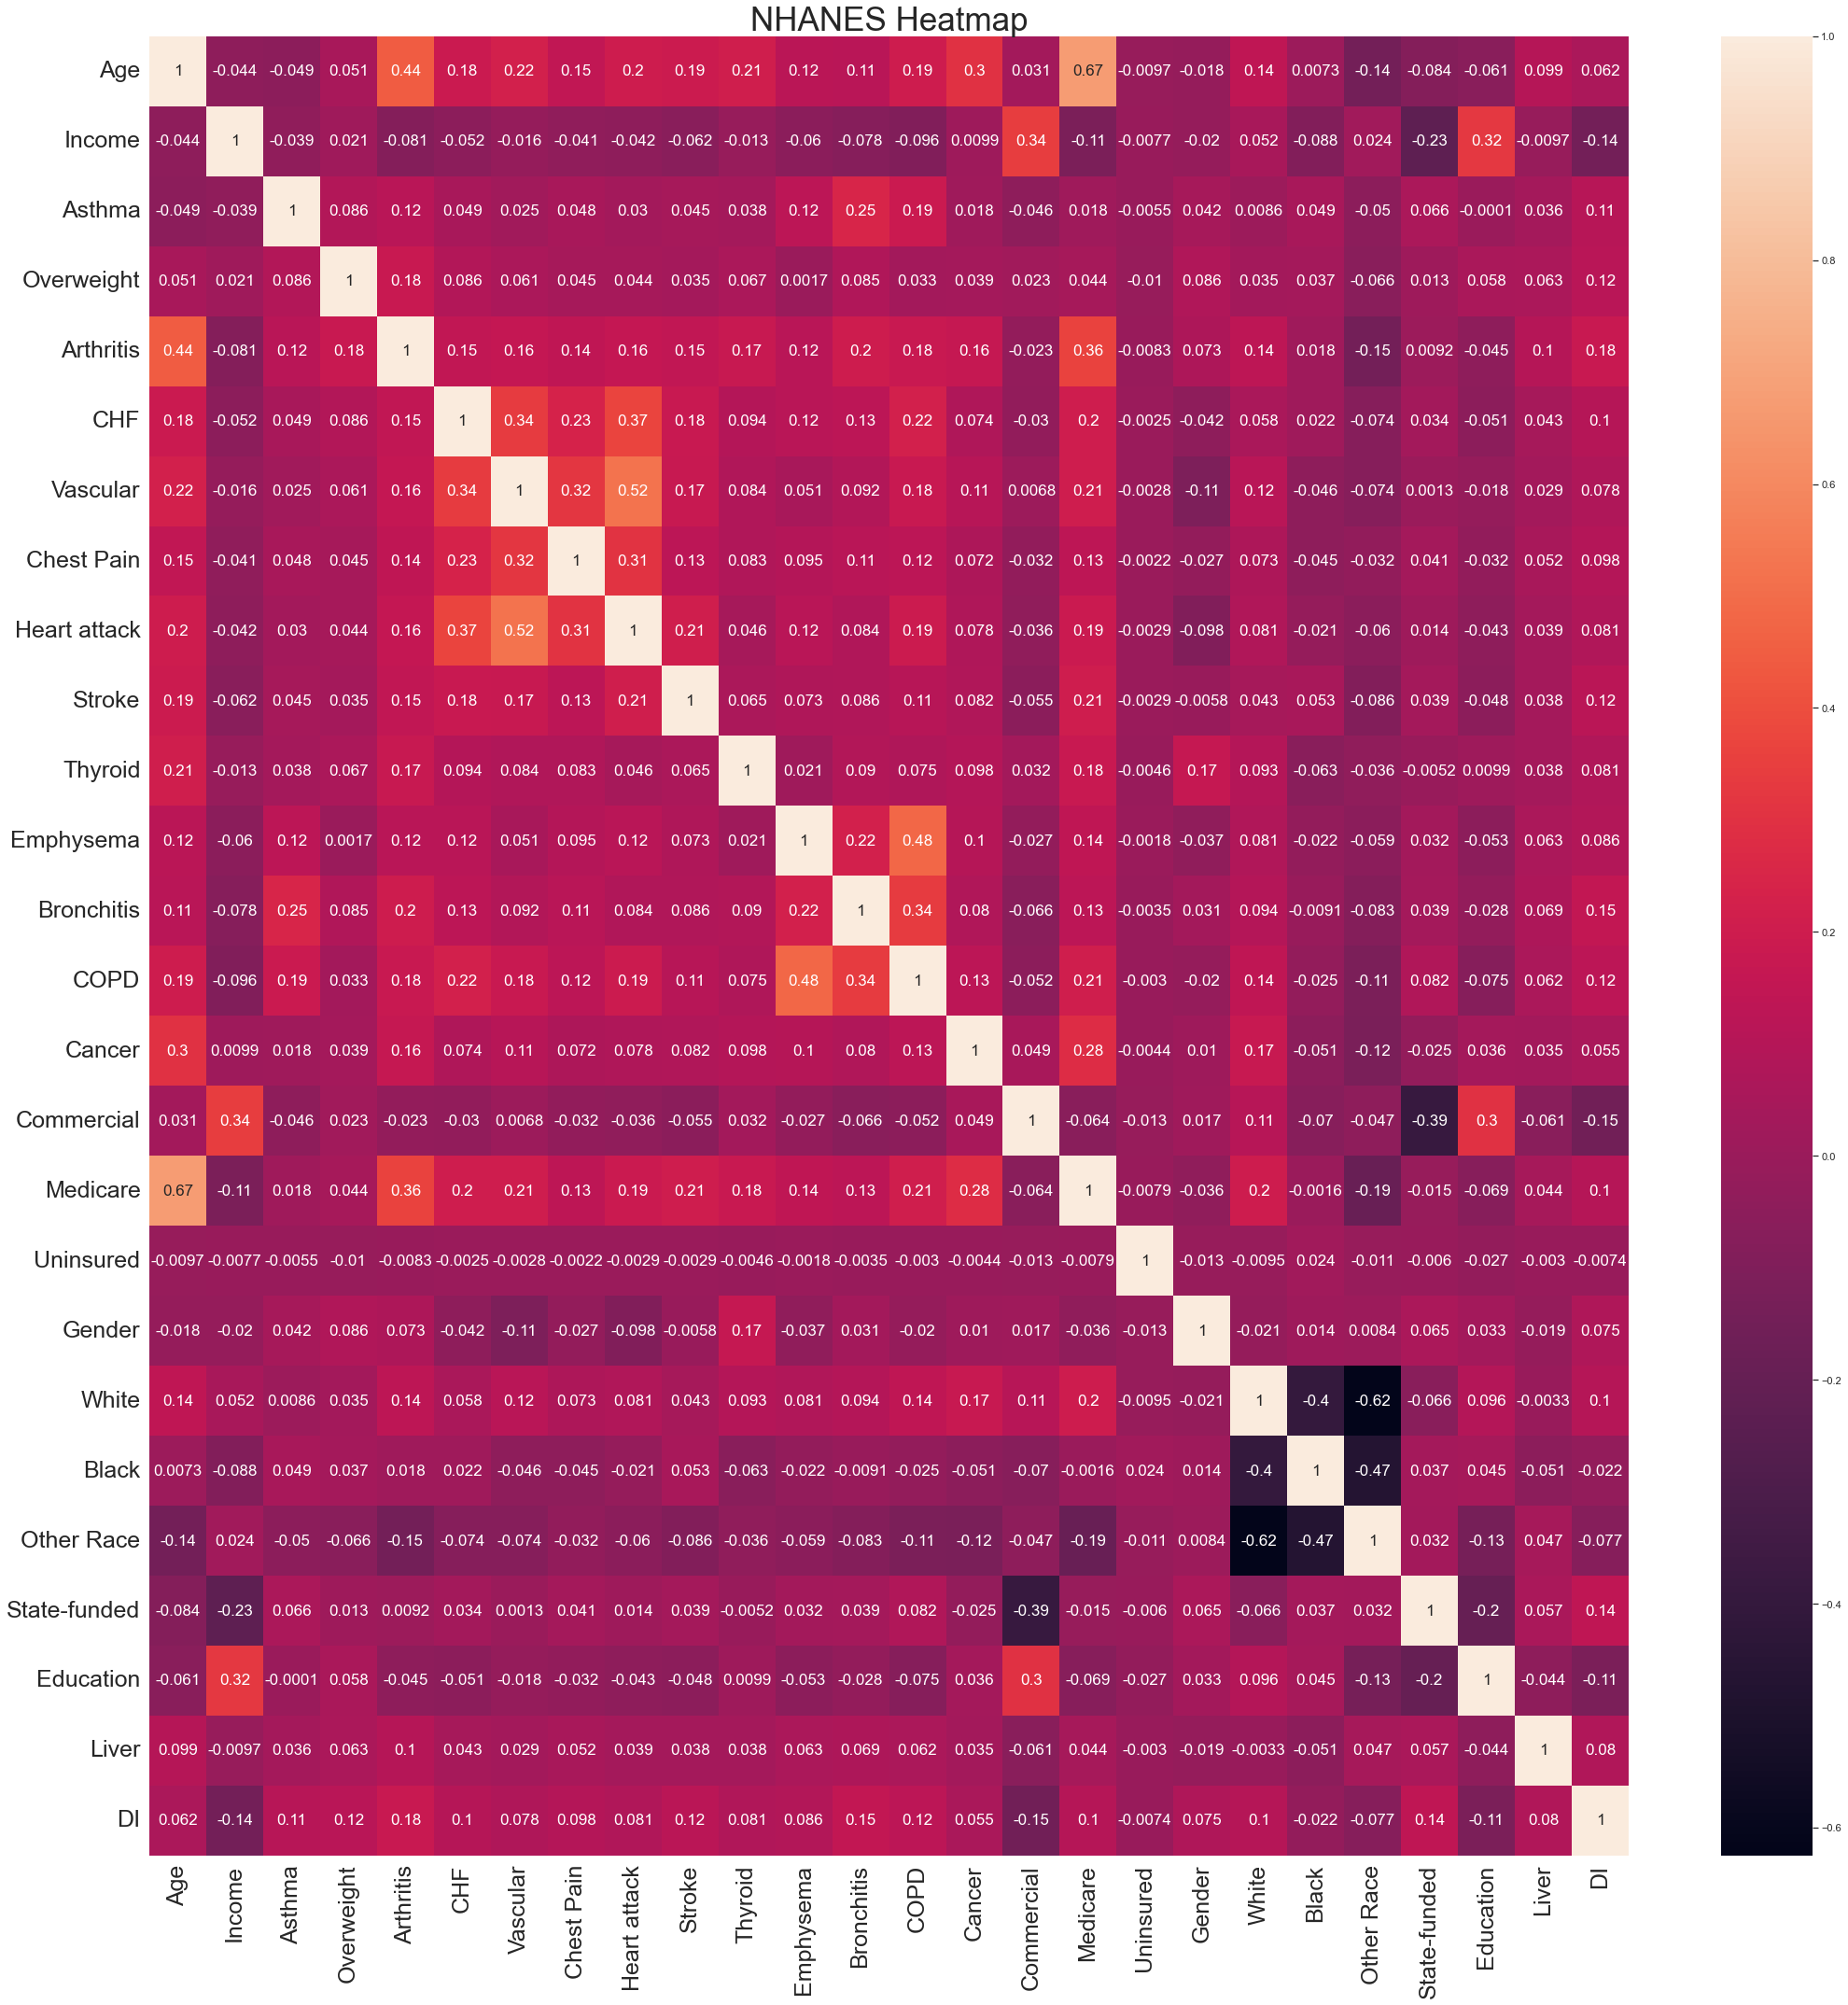

In [31]:
datanhan = nhanesdf.drop(['SEQN','PHQ Score','DPRN Level','Feels DPRN','DPRN Meds','DPQ1','DPQ2','DPQ3','DPQ4','DPQ5','DPQ6','DPQ7','DPQ8','DPQ9'],axis=1)
g = sns.heatmap(datanhan.corr(),annot=True, annot_kws={"fontsize":17})
g.set_yticklabels(g.get_yticklabels(),size=25, rotation=0)
g.set_xticklabels(g.get_xticklabels(),size=25, rotation=90)
g.set_title('NHANES Heatmap',size=35)
sns.set(rc = {'figure.figsize':(30,30)})
plt.tight_layout()
plt.savefig('fd NHANES_Heatmap.png', dpi= 1200)
plt.show()

Gender NAMCS

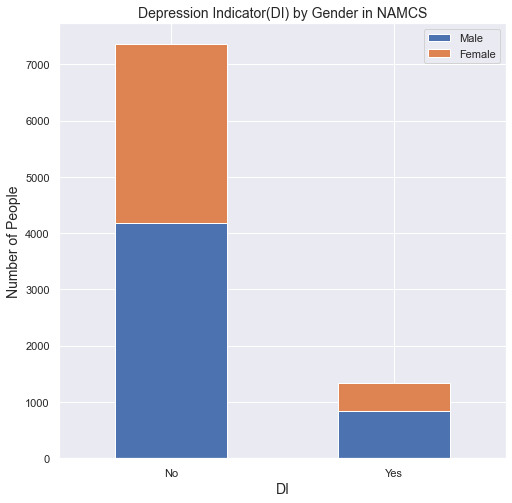

In [32]:
gendernamcs = pd.crosstab(index=namcsdf["DI"], columns=namcsdf["Gender"])
gendernamcs.plot(kind="bar", figsize=(8,8),stacked=True, legend = True)
plt.xlabel("DI",fontsize=14)
plt.ylabel("Number of People",fontsize=14)
plt.legend(["Male", "Female"])
plt.title("Depression Indicator(DI) by Gender in NAMCS",fontsize=14)
plt.xticks([1, 0], ['Yes', 'No'], rotation=360)
plt.savefig('fd namcs_sex_stack.png', dpi= 1200)

Gender NHANES

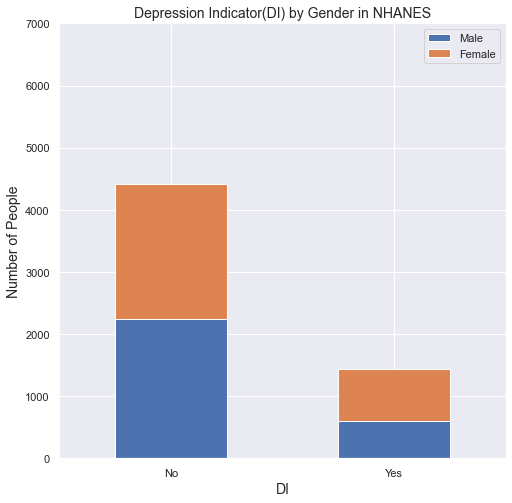

In [33]:
gendernhanes = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Gender"])
gendernhanes.plot(kind="bar", figsize=(8,8),stacked=True)
plt.xlabel("DI",fontsize=14)
plt.ylabel("Number of People",fontsize=14)
plt.legend(["Male", "Female"])
plt.title("Depression Indicator(DI) by Gender in NHANES",fontsize=14)
plt.xticks([1, 0], ['Yes', 'No'], rotation=360)
plt.ylim(0,7000)
plt.savefig('fd nhancs_sex_stack.png', dpi= 1200)

Co-morbid conditions NAMCS

In [34]:
cnm1 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Infection'])
cnm2 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Cancer/Blood'])
cnm3 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Metabolic'])
cnm4 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Neurologic'])
cnm5 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Eyes/Ears'])
cnm6 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Heart/Lung'])
cnm7 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Digestive'])
cnm8 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Skin'])
cnm9 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Bones'])
cnm10 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Urinary'])
cnm11 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Womens Health'])
cnm12 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Genetic'])
cnm13 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Other Disorder'])
cnm14 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Injury'])
cnm15 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Morbidity'])
cnm16 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Public health'])

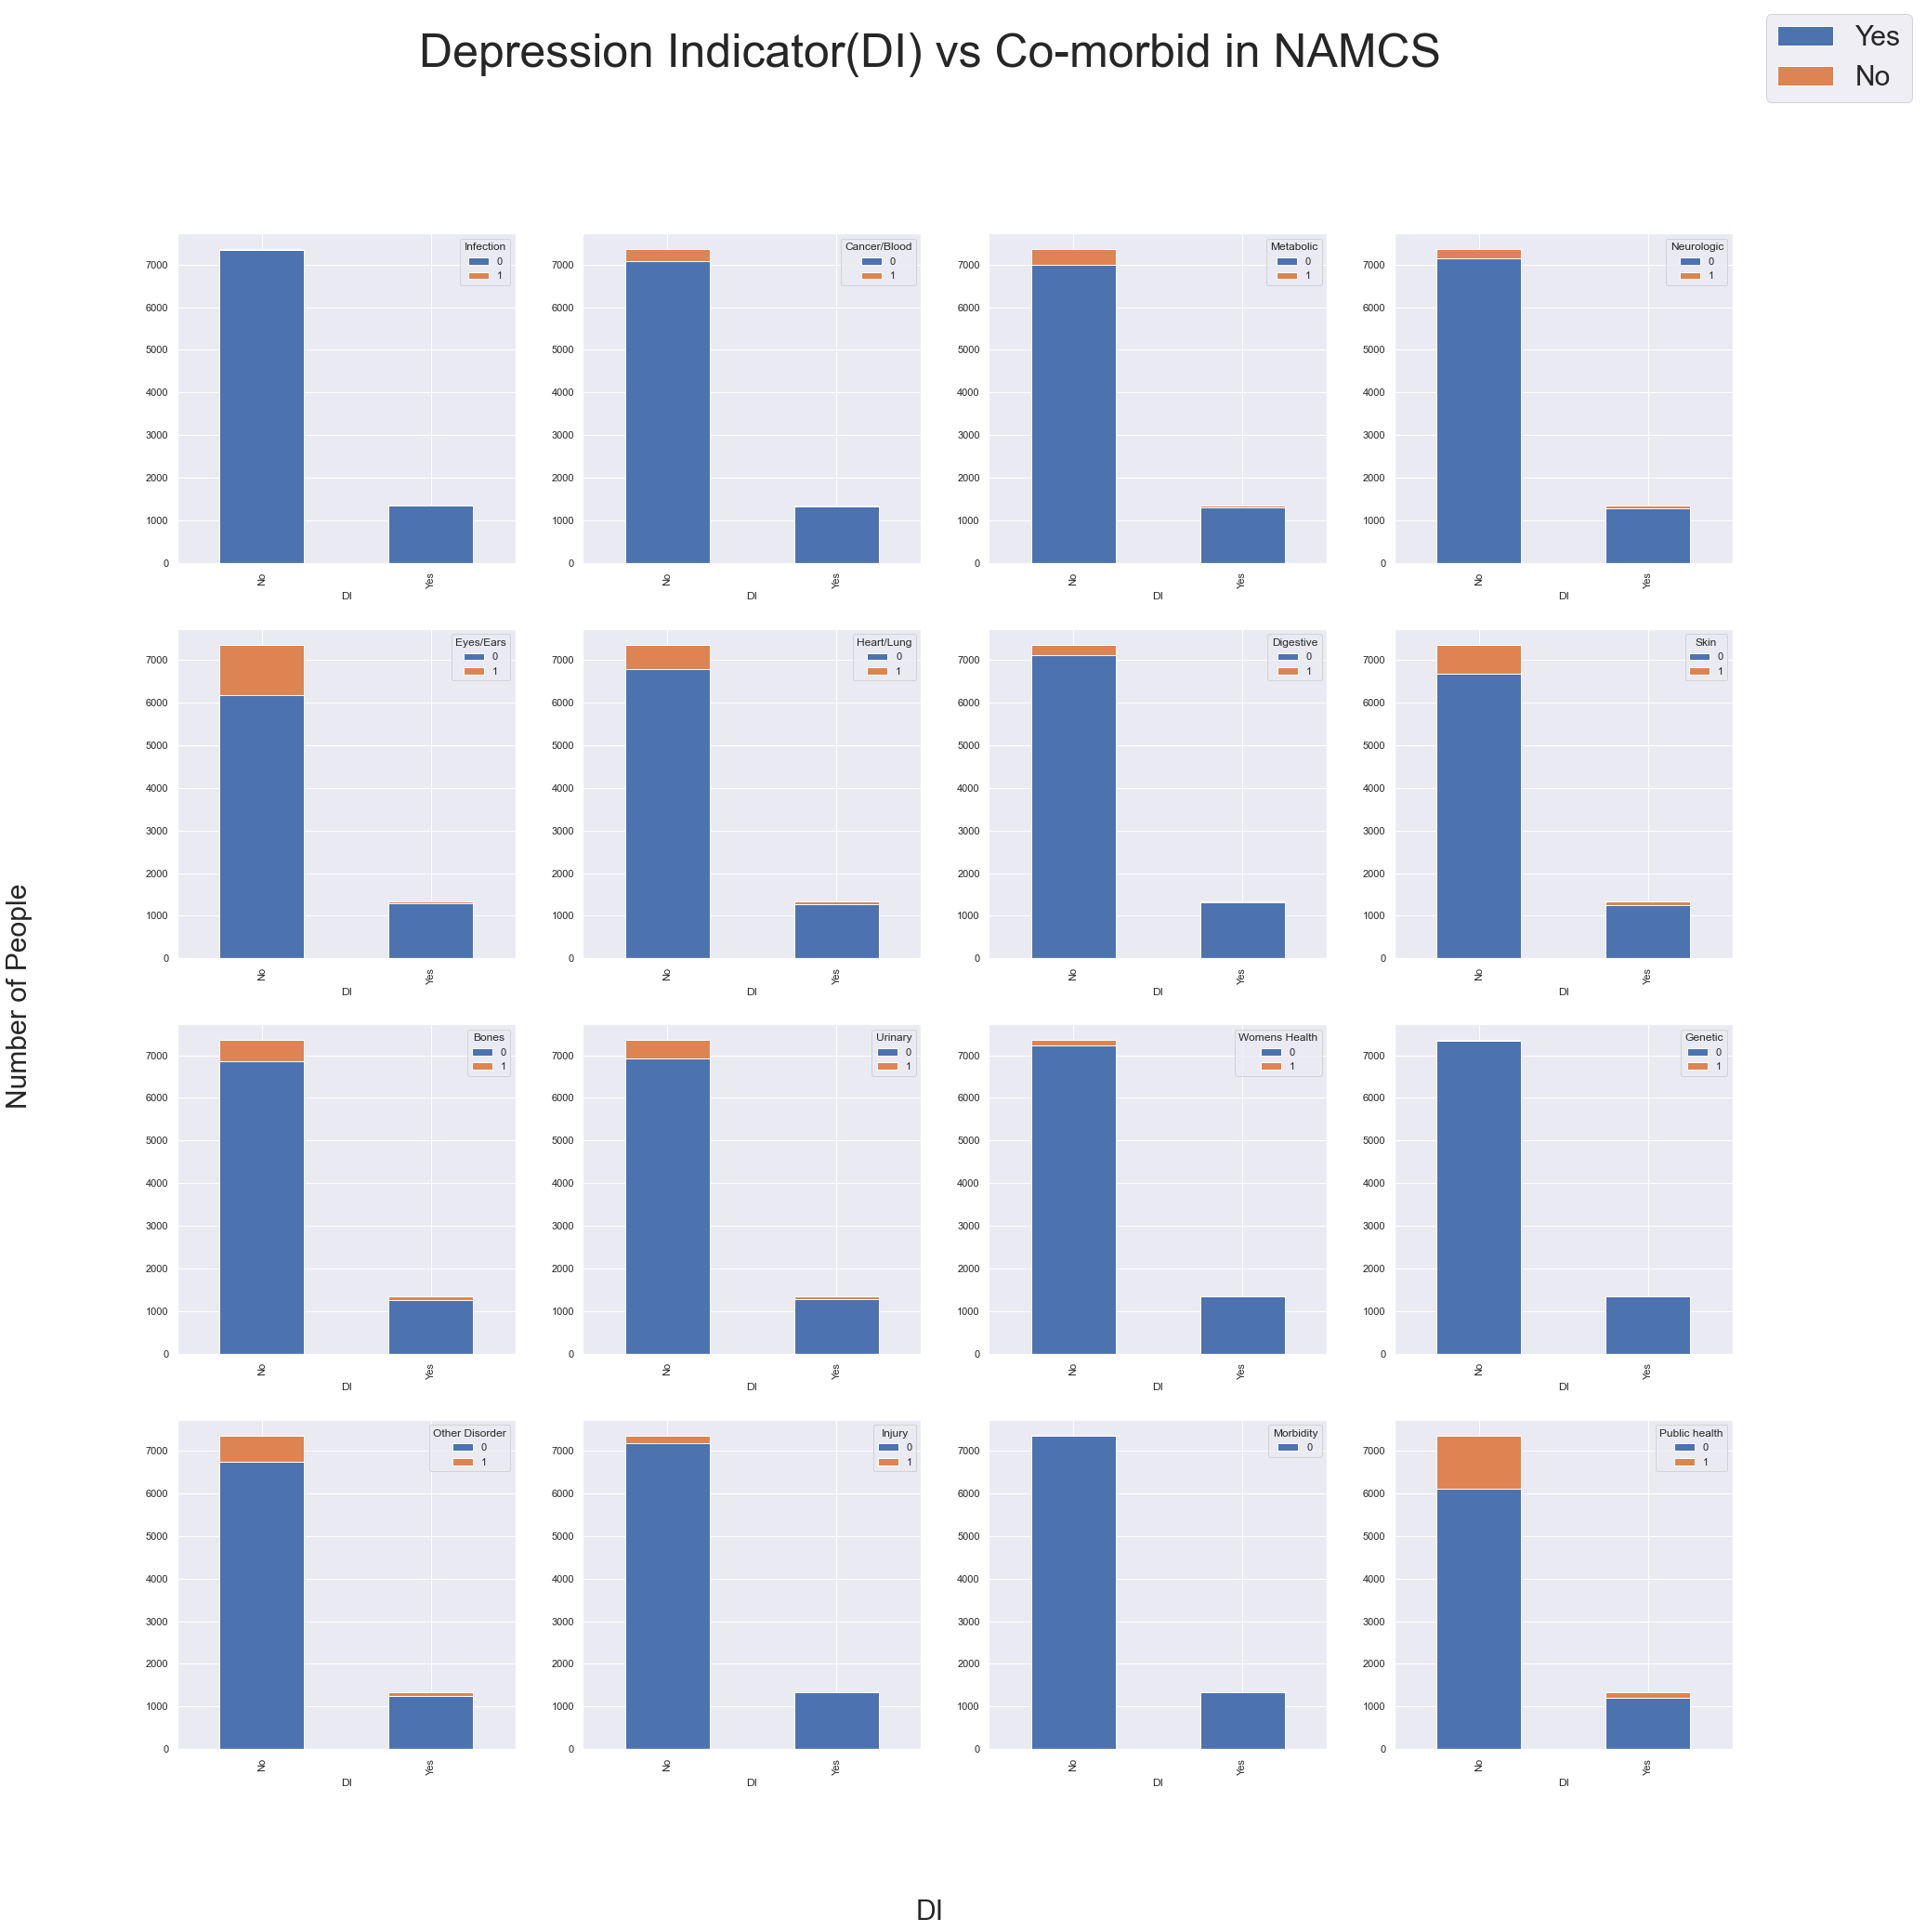

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=4)
cnm1.plot(kind="bar", stacked=True, ax=axes[0,0])
cnm2.plot(kind="bar", stacked=True, ax=axes[0,1])
cnm3.plot(kind="bar", stacked=True, ax=axes[0,2])
cnm4.plot(kind="bar", stacked=True, ax=axes[0,3])
cnm5.plot(kind="bar", stacked=True, ax=axes[1,0])
cnm6.plot(kind="bar", stacked=True, ax=axes[1,1])
cnm7.plot(kind="bar", stacked=True, ax=axes[1,2])
cnm8.plot(kind="bar", stacked=True, ax=axes[1,3])
cnm9.plot(kind="bar", stacked=True, ax=axes[2,0])
cnm10.plot(kind="bar",stacked=True, ax=axes[2,1])
cnm11.plot(kind="bar", stacked=True, ax=axes[2,2])
cnm12.plot(kind="bar", stacked=True, ax=axes[2,3])
cnm13.plot(kind="bar", stacked=True, ax=axes[3,0])
cnm14.plot(kind="bar", stacked=True, ax=axes[3,1])
cnm15.plot(kind="bar", stacked=True, ax=axes[3,2])
cnm16.plot(kind="bar", stacked=True, ax=axes[3,3])
fig.text(0.04, 0.5, 'Number of People', va='center', rotation='vertical', fontsize=30)
fig.text(0.5, 0.04, 'DI', ha='center',fontsize=30)
fig.legend(["Yes", "No"], fontsize= 30)
fig.suptitle("Depression Indicator(DI) vs Co-morbid in NAMCS",fontsize= 50)
plt.setp(axes,xticks=[1, 0], xticklabels= ['Yes', 'No'])
plt.savefig('fd DI vs Comorbid in NAMCS.png', dpi= 1200)

Co-morbid conditions NHANES

In [36]:
ct1 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Asthma"])
ct2 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Overweight"])
ct3 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Arthritis"])
ct4 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["CHF"])
ct5 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Vascular"])
ct6 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Chest Pain"])
ct7 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Heart attack"])
ct8 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Stroke"])
ct9 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Thyroid"])
ct10 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Emphysema"])
ct11 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Bronchitis"])
ct12 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["COPD"])
ct13 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Liver"])
ct14 = pd.crosstab(index=nhanesdf["DI"], columns=nhanesdf["Cancer"])

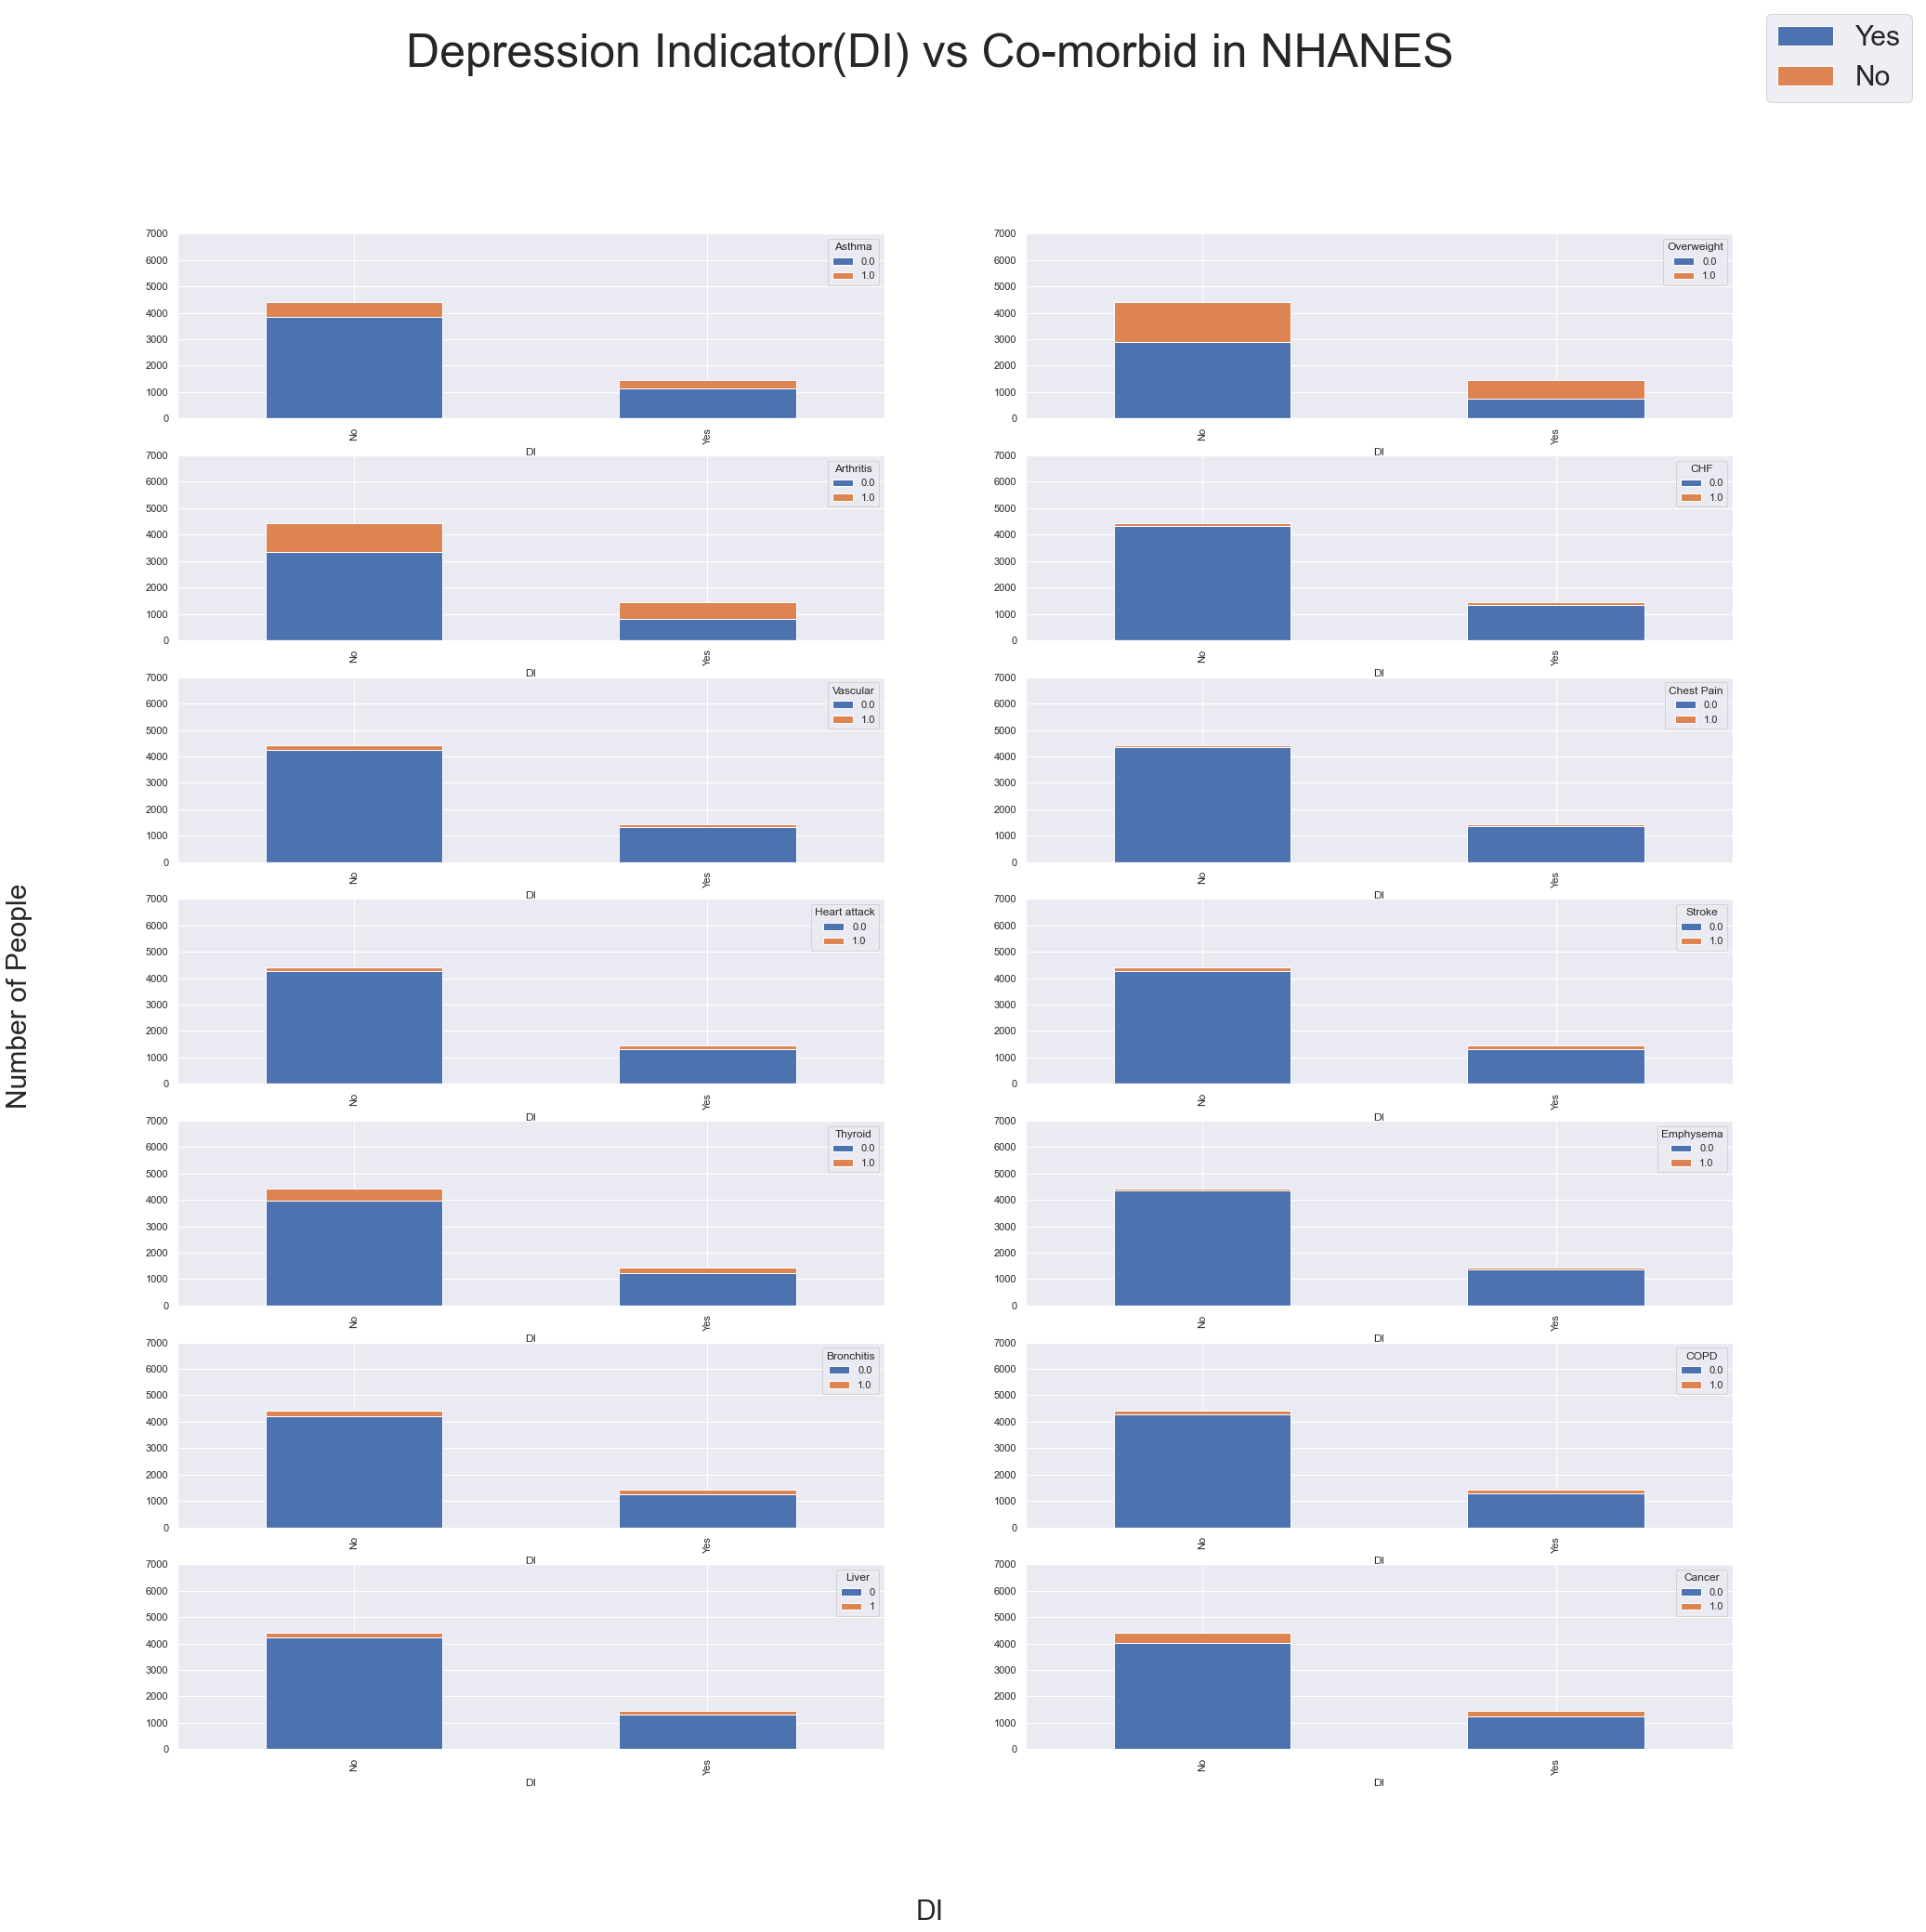

In [37]:
fig, axes = plt.subplots(nrows=7, ncols=2)
ct1.plot(kind="bar",stacked=True, ax=axes[0,0])
ct2.plot(kind="bar",stacked=True, ax=axes[0,1])
ct3.plot(kind="bar",stacked=True, ax=axes[1,0])
ct4.plot(kind="bar",stacked=True, ax=axes[1,1])
ct5.plot(kind="bar",stacked=True, ax=axes[2,0])
ct6.plot(kind="bar",stacked=True, ax=axes[2,1])
ct7.plot(kind="bar",stacked=True, ax=axes[3,0])
ct8.plot(kind="bar",stacked=True, ax=axes[3,1])
ct9.plot(kind="bar",stacked=True, ax=axes[4,0])
ct10.plot(kind="bar",stacked=True, ax=axes[4,1])
ct11.plot(kind="bar",stacked=True, ax=axes[5,0])
ct12.plot(kind="bar",stacked=True, ax=axes[5,1])
ct13.plot(kind="bar",stacked=True, ax=axes[6,0])
ct14.plot(kind="bar",stacked=True, ax=axes[6,1])
custom_ylim = (0, 7000)
plt.setp(axes, ylim=custom_ylim)
fig.text(0.04, 0.5, 'Number of People', va='center', rotation='vertical', fontsize=30)
fig.text(0.5, 0.04, 'DI', ha='center',fontsize=30)
fig.legend(["Yes", "No"], fontsize= 30)
fig.suptitle("Depression Indicator(DI) vs Co-morbid in NHANES",fontsize= 50)
plt.setp(axes,xticks=[1, 0], xticklabels= ['Yes', 'No'])
plt.savefig('fd comorbid_stack_nhanes.png', dpi= 1200)

Insurance NAMCS

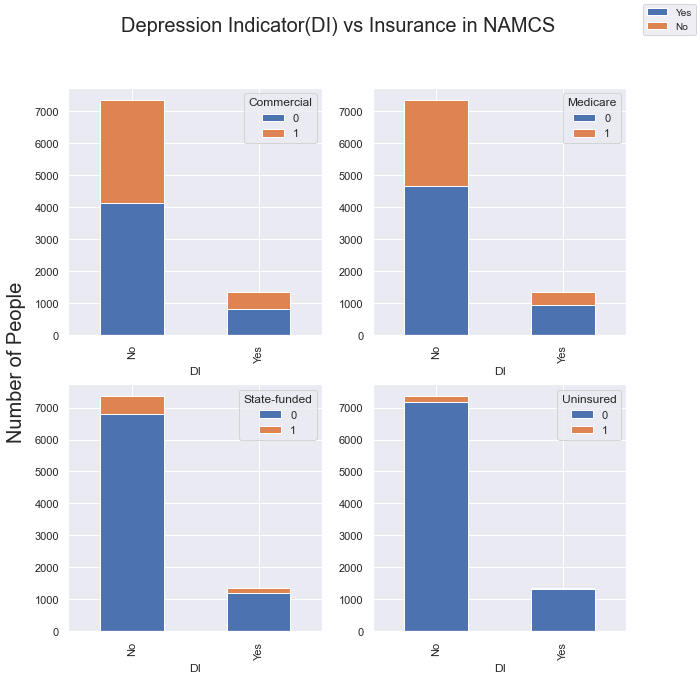

In [38]:
insnam1 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf["Commercial"])
insnam2 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf["Medicare"])
insnam3 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['State-funded'])
insnam4 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Uninsured'])

fig, axes = plt.subplots(nrows=2, ncols=2)

insnam1.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[0,0])
insnam2.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[0,1])
insnam3.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[1,0])
insnam4.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[1,1])
fig.text(0.04, 0.5, 'Number of People', va='center', rotation='vertical', fontsize=20)
fig.legend(["Yes", "No"], fontsize= 10)
fig.suptitle("Depression Indicator(DI) vs Insurance in NAMCS",fontsize= 20)
plt.setp(axes,xticks=[1, 0], xticklabels= ['Yes', 'No'])
plt.savefig('fd DI vs Insurance in NAMCS.png', dpi= 1200)

Insurance NHANES

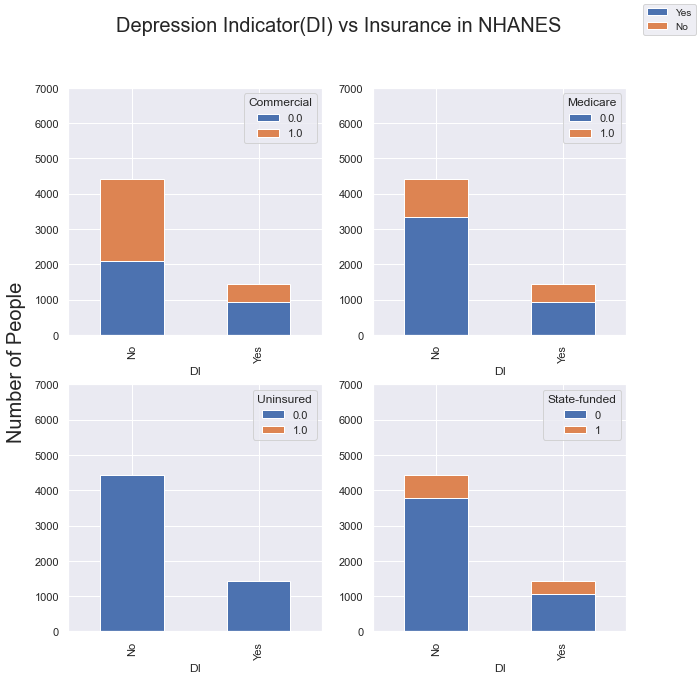

In [39]:
deprprvt = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["Commercial"])
deprcare = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["Medicare"])
deprnoch = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["Uninsured"])
deprstate = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["State-funded"])

fig, axes = plt.subplots(nrows=2, ncols=2)

deprprvt.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[0,0])
deprcare.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[0,1])
deprnoch.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[1,0])
deprstate.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[1,1])
custom_ylim = (0, 7000)
plt.setp(axes, ylim=custom_ylim)
fig.text(0.04, 0.5, 'Number of People', va='center', rotation='vertical', fontsize=20)
fig.legend(["Yes", "No"], fontsize= 10)
fig.suptitle("Depression Indicator(DI) vs Insurance in NHANES",fontsize= 20)
plt.setp(axes,xticks=[1, 0], xticklabels= ['Yes', 'No'])
plt.savefig('fd Insurance in NHANES.png', dpi= 1200)

Provider NAMCS

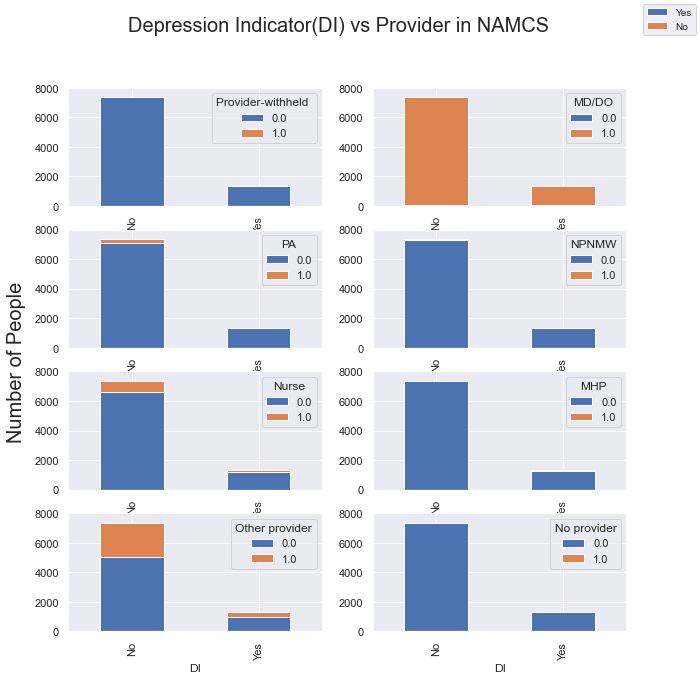

In [40]:
pr1 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf["Provider-withheld "])
pr2 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf["MD/DO"])
pr3 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['PA'])
pr4 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['NPNMW'])
pr5 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Nurse'])
pr6 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['MHP'])
pr7 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['Other provider'])
pr8 = pd.crosstab(index=namcsdf["DI"],columns= namcsdf['No provider'])

fig, axes = plt.subplots(nrows=4, ncols=2)

pr1.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[0,0])
pr2.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[0,1])
pr3.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[1,0])
pr4.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[1,1])
pr5.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[2,0])
pr6.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[2,1])
pr7.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[3,0])
pr8.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[3,1])

custom_ylim = (0, 8000)
plt.setp(axes, ylim=custom_ylim)
fig.text(0.04, 0.5, 'Number of People', va='center', rotation='vertical', fontsize=20)
fig.legend(["Yes", "No"], fontsize= 10)
fig.suptitle("Depression Indicator(DI) vs Provider in NAMCS",fontsize= 20)
plt.setp(axes,xticks=[1, 0], xticklabels= ['Yes', 'No'])
plt.savefig('fd DI vs PROVIDER in NAMCS.png', dpi= 1200)

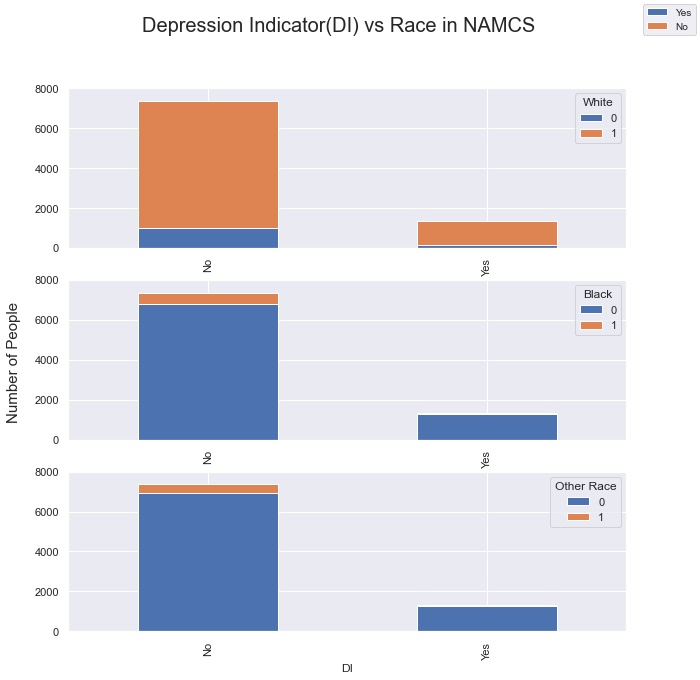

In [41]:
depracewh = pd.crosstab(index=namcsdf["DI"],columns= namcsdf["White"])
depracebl = pd.crosstab(index=namcsdf["DI"], columns=namcsdf["Black"])
depraceot = pd.crosstab(index=namcsdf["DI"],columns= namcsdf["Other Race"])
deprage = pd.crosstab(index=namcsdf["DI"],columns= namcsdf["Age"])

fig, axes = plt.subplots(nrows=3, ncols=1)

depracewh.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[0])
depracebl.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[1])
depraceot.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[2])
custom_ylim = (0, 8000)
plt.setp(axes, ylim=custom_ylim)
fig.text(0.04, 0.5, 'Number of People', va='center', rotation='vertical', fontsize=15)
fig.legend(["Yes", "No"], fontsize= 10)
fig.suptitle("Depression Indicator(DI) vs Race in NAMCS",fontsize= 20)
plt.setp(axes,xticks=[1, 0], xticklabels= ['Yes', 'No'])
plt.savefig('fd RaceF in NAMCS.png', dpi= 1200)

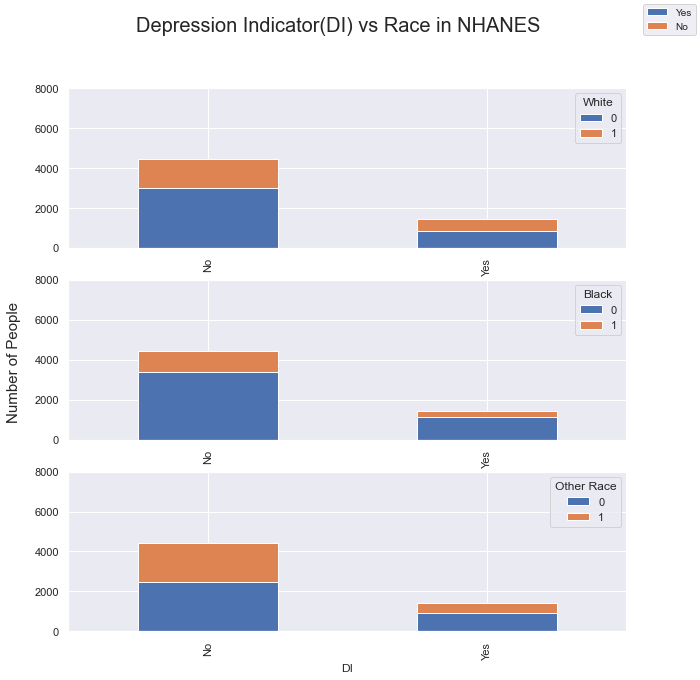

In [42]:
depracewh = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["White"])
depracebl = pd.crosstab(index=nhanesdf["DI"],columns=nhanesdf["Black"])
depraceot = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["Other Race"])

fig, axes = plt.subplots(nrows=3, ncols=1)

depracewh.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[0]) 
depracebl.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[1]) 
depraceot.plot(kind="bar", figsize=(10,10),stacked=True, ax=axes[2]) 
fig.text(0.04, 0.5, 'Number of People', va='center', rotation='vertical', fontsize=15)
fig.legend(["Yes", "No"], fontsize= 10)
fig.suptitle("Depression Indicator(DI) vs Race in NHANES",fontsize= 20)
plt.setp(axes,xticks=[1, 0], xticklabels= ['Yes', 'No'])
custom_ylim = (0, 8000)
plt.setp(axes, ylim=custom_ylim)
plt.savefig('fd Race in NHANES.png', dpi= 1000)

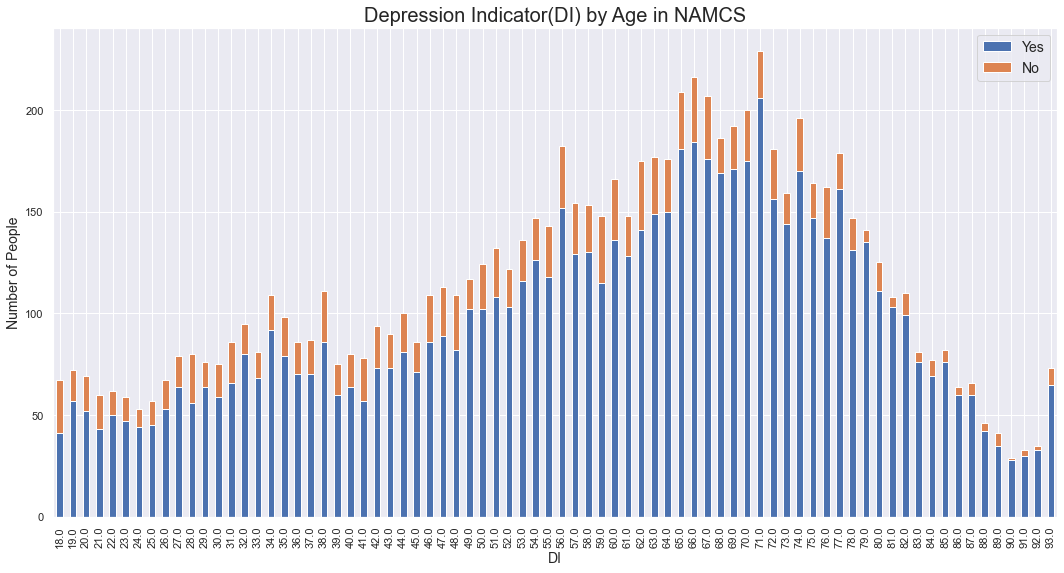

In [43]:
deprage.T.plot(kind="bar",figsize=(18,9),stacked=True,legend=True)
plt.xlabel("DI",fontsize=14)
plt.ylabel("Number of People",fontsize=14)
plt.legend(["Yes", "No"],fontsize=14)
plt.title("Depression Indicator(DI) by Age in NAMCS", fontsize= 20)
plt.savefig('fd Age in NAMCS.png', dpi= 1200)

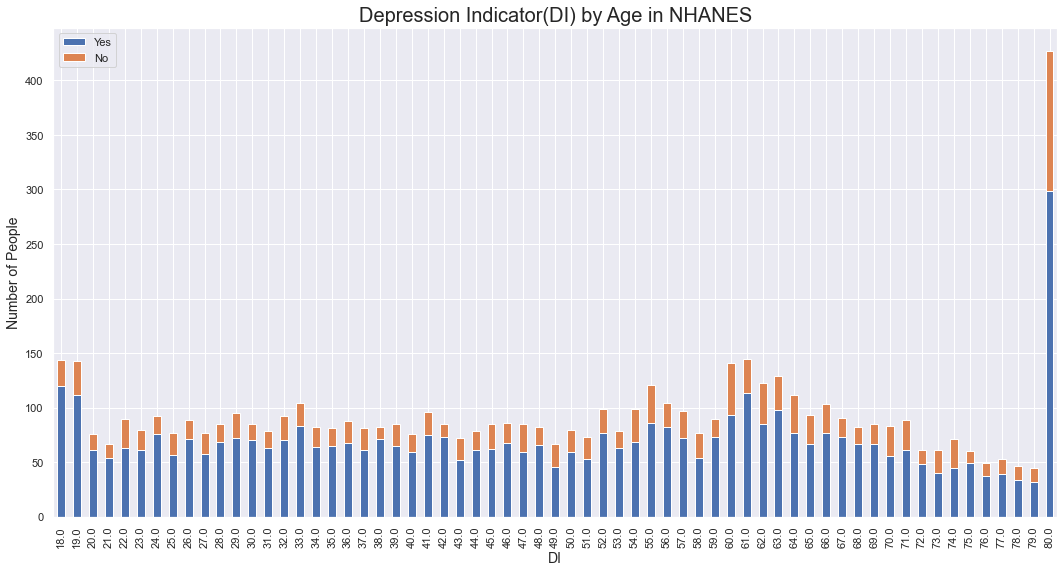

In [44]:
deprage = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["Age"])
deprage.T.plot(kind="bar",figsize=(18,9),stacked=True,legend=True)
plt.xlabel("DI",fontsize=14)
plt.ylabel("Number of People",fontsize=14)
plt.legend(["Yes", "No"])
plt.title("Depression Indicator(DI) by Age in NHANES", fontsize= 20)
plt.savefig('fd Age in NHANES.png', dpi= 1200)

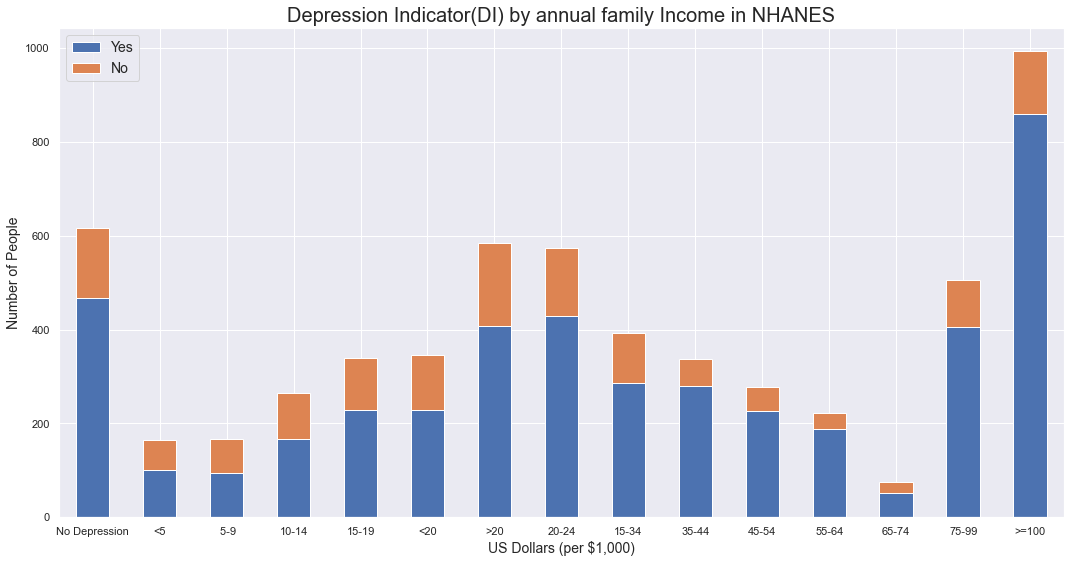

In [45]:
deprincome = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["Income"])
deprincome.T.plot(kind="bar",figsize=(18,9),stacked=True,legend=True)
plt.xlabel("US Dollars (per $1,000)",fontsize=14)
plt.ylabel("Number of People",fontsize=14)
plt.legend(["Yes", "No"],fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['No Depression','<5', ' 5-9', '10-14', '15-19','<20' , '>20', '20-24', '15-34', '35-44', '45-54', '55-64', '65-74',  '75-99', '>=100'], rotation=360)
plt.title("Depression Indicator(DI) by annual family Income in NHANES", fontsize= 20)
plt.savefig('fd Income in NHANES.png', dpi= 1200)

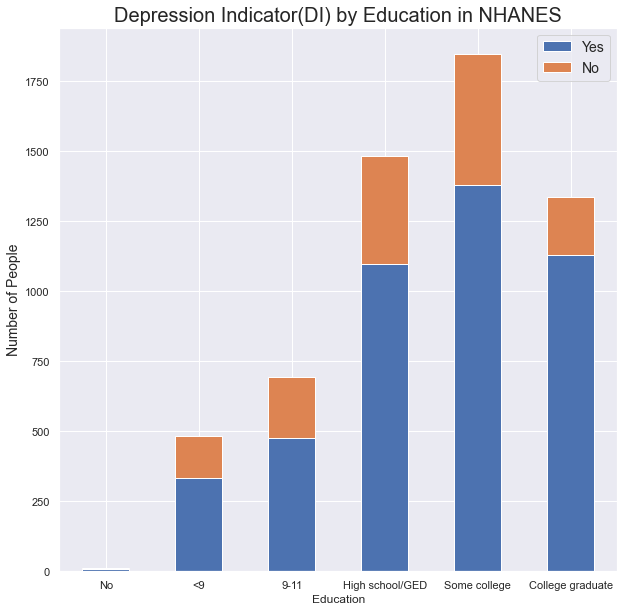

In [46]:
depredu = pd.crosstab(index=nhanesdf["DI"],columns= nhanesdf["Education"])
fig, axes
depredu.T.plot(kind="bar",figsize=(10,10),stacked=True,legend=True)
plt.ylabel("Number of People",fontsize=14)
plt.legend(["Yes", "No"],fontsize=14)
plt.title("Depression Indicator(DI) by Education in NHANES", fontsize= 20)
plt.xticks([0, 1, 2, 3, 4, 5], ['No','<9','9-11','High school/GED','Some college','College graduate'], rotation=360)
plt.savefig(' fd DI vs Educ in NHANES.png', dpi= 1200)

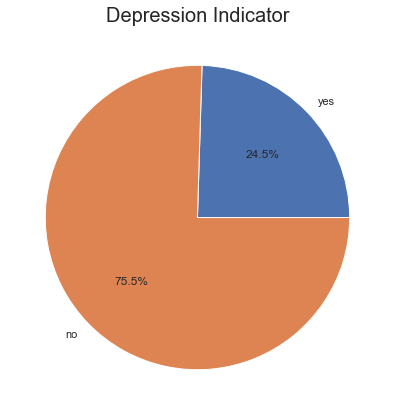

In [47]:
ones=nhanesdf['DI'].sum()
zeros = nhanesdf.shape[0]-ones
size=[ones,zeros]
lab = ['yes','no']
fig = plt.figure(figsize =(10, 7))
plt.pie(size,labels=lab,autopct='%1.1f%%')
plt.title('Depression Indicator',fontsize=20)
plt.savefig('fd DI in NHANES.png', dpi= 1200)
plt.show()

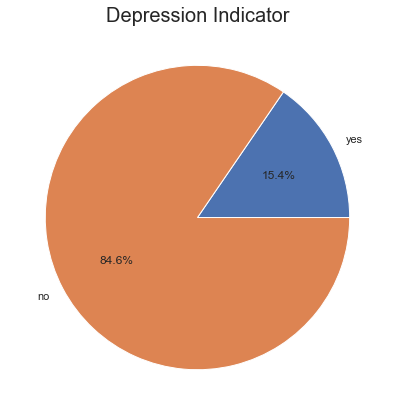

In [48]:
ones=namcsdf['DI'].sum()
zeros = namcsdf.shape[0]-ones
size=[ones,zeros]
lab = ['yes','no']
fig = plt.figure(figsize =(10, 7))
plt.pie(size,labels=lab,autopct='%1.1f%%')
plt.title('Depression Indicator',fontsize=20)
plt.savefig('fd DI in NAMCS.png', dpi= 1200)
plt.show()

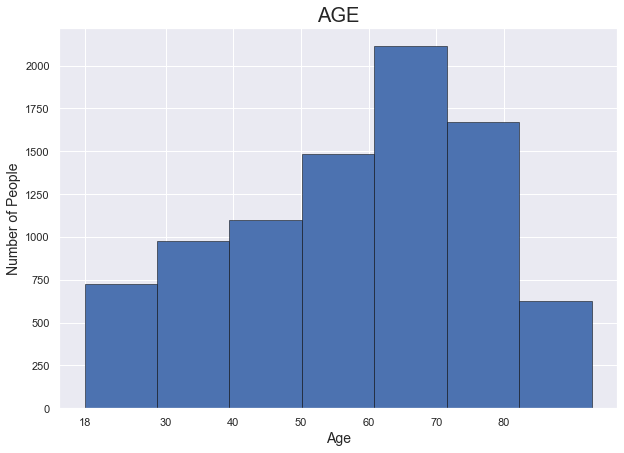

In [49]:
fig=plt.figure(figsize =(10, 7))
plt.hist(namcsdf['Age'], edgecolor='black', linewidth=0.5, bins=7)
plt.title("AGE",fontsize=20)
plt.xlabel("Age",fontsize=14)
plt.ylabel("Number of People",fontsize=14)
plt.xticks([18, 30, 40, 50, 60, 70, 80])
plt.savefig('fd only Age in NAMCS.png', dpi= 1200)

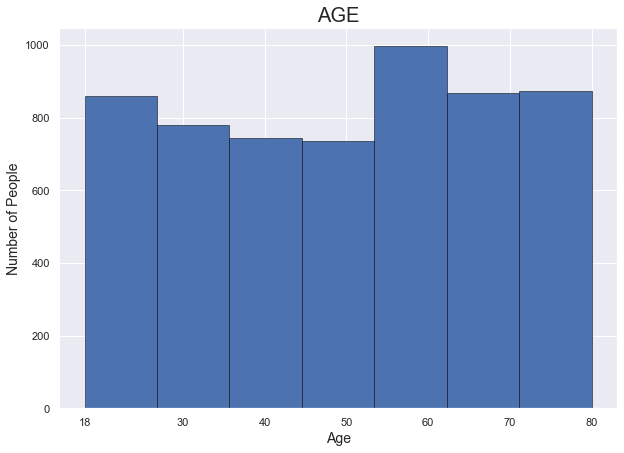

In [50]:
fig=plt.figure(figsize =(10, 7))
plt.hist(nhanesdf['Age'], edgecolor='black', linewidth=0.5, bins=7)
plt.title("AGE",fontsize=20)
plt.xlabel("Age",fontsize=14)
plt.ylabel("Number of People",fontsize=14)
plt.xticks([18, 30, 40, 50, 60, 70, 80])
plt.savefig('fd only Age in NHANES.png', dpi= 1200)